# Making a Music Genre Classifier

## Data Gathering

### Process
1. Understand how audio is processed
2. Determine what features to extract from the audio signal
3. Understand what each feature represents and how it is calculated
4. Write a function that reads and extracts important numeric features from audio signals from a given directory


### Tests with Single Audio File

In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

### Extracting an Audio Signal

A **signal** is a variation in a quantity over time. For audio, the quantity that varies is air pressure. We can represent a signal digitally by taking samples of the air pressure over time. We are left with a waveform for the signal. Librosa is a python library that allows us to extract waveforms from audio files along with several other features. This is the primary package that will be used for this project.

In [2]:
# Extracting the wave, "y", and sampling rate, "sr", of the audio file
y, sr = librosa.load('../data/wavfiles/blues.00000.wav')

In [3]:
# Checking the shape of the wave
y.shape

(661794,)

In [4]:
y

array([ 0.00732422,  0.01660156,  0.00762939, ..., -0.05560303,
       -0.06106567, -0.06417847], dtype=float32)

In [5]:
#sample rate
sr

22050

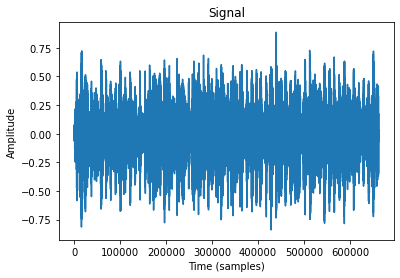

In [6]:
# Plotting the wave
plt.plot(y);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

##### Above is the example of an audio sample we will be using to train our model and make prediction.

### Defining Function to Read and Extract Numeric Features from Audio Files

In [7]:
def extract_audio_features(directory):
    '''
    This function takes in a directory of .wav files and returns a 
    DataFrame that includes several numeric features of the audio file 
    as well as the corresponding genre labels.
    
    The numeric features incuded are the first 13 mfccs, zero-crossing rate, 
    spectral centroid, and spectral rolloff.
    
    Parameters:
    directory (int): a directory of audio files in .wav format
    
    Returns:
    df (DataFrame): a table of audio files that includes several numeric features 
    and genre labels.
    '''
    
    # Creating an empty list to store all file names
    files = []
    labels = []
    zcrs = []
    spec_centroids = []
    spec_rolloffs = []
    mfccs_1 = []
    mfccs_2 = []
    mfccs_3 = []
    mfccs_4 = []
    mfccs_5 = []
    mfccs_6 = []
    mfccs_7 = []
    mfccs_8 = []
    mfccs_9 = []
    mfccs_10 = []
    mfccs_11 = []
    mfccs_12 = []
    mfccs_13 = []
    
    # Looping through each file in the directory
    for file in os.scandir(directory):
        
        # Loading in the audio file
        y, sr = librosa.core.load(file)
        
        # Adding the file to our list of files
        files.append(file)
        
        # Adding the label to our list of labels
        label = str(file).split('.')[0]
        labels.append(label)
        
        # Calculating zero-crossing rates
        zcr = librosa.feature.zero_crossing_rate(y)
        zcrs.append(np.mean(zcr))
        
        # Calculating the spectral centroids
        spec_centroid = librosa.feature.spectral_centroid(y)
        spec_centroids.append(np.mean(spec_centroid))
        
        # Calculating the spectral rolloffs
        spec_rolloff = librosa.feature.spectral_rolloff(y)
        spec_rolloffs.append(np.mean(spec_rolloff))
        
        # Calculating the first 13 mfcc coefficients
        mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=512, n_mfcc=13)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        mfccs_1.append(mfcc_scaled[0])
        mfccs_2.append(mfcc_scaled[1])
        mfccs_3.append(mfcc_scaled[2])
        mfccs_4.append(mfcc_scaled[3])
        mfccs_5.append(mfcc_scaled[4])
        mfccs_6.append(mfcc_scaled[5])
        mfccs_7.append(mfcc_scaled[6])
        mfccs_8.append(mfcc_scaled[7])
        mfccs_9.append(mfcc_scaled[8])
        mfccs_10.append(mfcc_scaled[9])
        mfccs_11.append(mfcc_scaled[10])
        mfccs_12.append(mfcc_scaled[11])
        mfccs_13.append(mfcc_scaled[12])
    
    # Creating a data frame with the values we collected
    df = pd.DataFrame({
        'files': files,
        'zero_crossing_rate': zcrs,
        'spectral_centroid': spec_centroids,
        'spectral_rolloff': spec_rolloffs,
        'mfcc_1': mfccs_1,
        'mfcc_2': mfccs_2,
        'mfcc_3': mfccs_3,
        'mfcc_4': mfccs_4,
        'mfcc_5': mfccs_5,
        'mfcc_6': mfccs_6,
        'mfcc_7': mfccs_7,
        'mfcc_8': mfccs_8,
        'mfcc_9': mfccs_9,
        'mfcc_10': mfccs_10,
        'mfcc_11': mfccs_11,
        'mfcc_12': mfccs_12,
        'mfcc_13': mfccs_13,
        'labels': labels
    })
    
    # Returning the data frame
    return df

In [8]:
# Using the function to read and extract the audio files from the GTZAN Genre Dataset
df = extract_audio_features('../data/wavfiles')

In [9]:
df.to_csv('../csv/genre.csv', index=False)

##### Exported the extracted audio features into a dataframe.

In [10]:
df.head()

,files,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,labels
0,<DirEntry 'blues.00000.wav'>,0.083045,1784.165850,3805.839606,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704889,15.343150,-12.274110,10.976572,-8.326573,8.803792,-3.672300,<DirEntry 'blues
1,<DirEntry 'blues.00001.wav'>,0.056040,1530.176679,3550.522098,-207.501694,123.991264,8.955127,35.877647,2.907320,21.510468,-8.560436,23.370686,-10.099661,11.900496,-5.555639,5.376327,-2.231760,<DirEntry 'blues
2,<DirEntry 'blues.00002.wav'>,0.076291,1552.811865,3042.260232,-90.722595,140.446304,-29.093889,31.684334,-13.984505,25.764742,-13.664875,11.639934,-11.783642,9.718760,-13.133803,5.791199,-8.907628,<DirEntry 'blues
3,<DirEntry 'blues.00003.wav'>,0.033309,1070.106615,2184.745799,-199.544205,150.090897,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759187,8.137607,-3.200653,6.079319,-2.480174,<DirEntry 'blues
4,<DirEntry 'blues.00004.wav'>,0.101461,1835.004266,3579.757627,-160.337708,126.219635,-35.587811,22.148071,-32.478603,10.852294,-23.352331,0.498434,-11.793437,1.207255,-13.088418,-2.813867,-6.933384,<DirEntry 'blues


### Creating Labels

In [11]:
genre = pd.read_csv('../csv/genre.csv')

In [12]:
# Fixing the file names and labels
genre['labels'] = genre['labels'].map(lambda x: x[11:])

In [13]:
# Mapping the labels to numeric values
label_map = {
    'blues': 1,
    'classical': 2,
    'country': 3,
    'disco': 4,
    'hiphop': 5,
    'jazz': 6,
    'metal': 7,
    'pop': 8,
    'reggae': 9,
    'rock': 10
}

genre['y'] = genre['labels'].map(label_map)

In [14]:
genre.head()

,files,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,labels,y
0,<DirEntry 'blues.00000.wav'>,0.083045,1784.165850,3805.839606,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704889,15.343150,-12.274110,10.976572,-8.326573,8.803792,-3.672300,blues,1
1,<DirEntry 'blues.00001.wav'>,0.056040,1530.176679,3550.522098,-207.501694,123.991264,8.955127,35.877647,2.907320,21.510468,-8.560436,23.370686,-10.099661,11.900496,-5.555639,5.376327,-2.231760,blues,1
2,<DirEntry 'blues.00002.wav'>,0.076291,1552.811865,3042.260232,-90.722595,140.446304,-29.093889,31.684334,-13.984505,25.764742,-13.664875,11.639934,-11.783642,9.718760,-13.133803,5.791199,-8.907628,blues,1
3,<DirEntry 'blues.00003.wav'>,0.033309,1070.106615,2184.745799,-199.544205,150.090897,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759187,8.137607,-3.200653,6.079319,-2.480174,blues,1
4,<DirEntry 'blues.00004.wav'>,0.101461,1835.004266,3579.757627,-160.337708,126.219635,-35.587811,22.148071,-32.478603,10.852294,-23.352331,0.498434,-11.793437,1.207255,-13.088418,-2.813867,-6.933384,blues,1


### Cleaning the Data Set
  
1) Removing all the string values features like 'files', 'label'.  
2) One Hot Encoding categorical variables (if any).  
3) Dropping NaN values (if any).

In [15]:
genre_clean = genre.drop(columns=['files','labels'])

In [16]:
genre_clean.head()

,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,y
0,0.083045,1784.165850,3805.839606,-113.570648,121.571793,-19.168142,42.366421,-6.364664,18.623499,-13.704889,15.343150,-12.274110,10.976572,-8.326573,8.803792,-3.672300,1
1,0.056040,1530.176679,3550.522098,-207.501694,123.991264,8.955127,35.877647,2.907320,21.510468,-8.560436,23.370686,-10.099661,11.900496,-5.555639,5.376327,-2.231760,1
2,0.076291,1552.811865,3042.260232,-90.722595,140.446304,-29.093889,31.684334,-13.984505,25.764742,-13.664875,11.639934,-11.783642,9.718760,-13.133803,5.791199,-8.907628,1
3,0.033309,1070.106615,2184.745799,-199.544205,150.090897,5.662678,26.859079,1.771399,14.234031,-4.832006,9.286495,-0.759187,8.137607,-3.200653,6.079319,-2.480174,1
4,0.101461,1835.004266,3579.757627,-160.337708,126.219635,-35.587811,22.148071,-32.478603,10.852294,-23.352331,0.498434,-11.793437,1.207255,-13.088418,-2.813867,-6.933384,1


In [17]:
genre_clean.to_csv('../csv/genre_clean.csv', index=False)

#### Above file (genre_clean.csv) is the final Dataframe we'll use to train the machine learning model